#Perceptrón Simple
<img src="https://drive.google.com/uc?export=view&id=1ZPeYXzwqlSu1nR-wI-VtV0lhSaFh-Igt" width="50%" height="35%"/>

Es un algoritmo basado en el comportamiento de la neurona, en él hay multiples entradas que se multiplican por sus respectivos  pesos y en el nucleo se realiza la suma ponderada de las entradas por los pesos.

Tiene la siguiente interpretación matematica:

$\mathbf{x}=\left[\begin{array}{c}x_1 \\ x_2 \\ \vdots \\ x_i\end{array}\right]$, es el vector de entrada $\mathbf{x} \in \mathbb{R}^{i}$ 

$\mathbf{w}=\left[\begin{array}{c}w_1 \\ w_2 \\ \vdots \\ w_i\end{array}\right]$,es el vetor de pesos $\mathbf{w} \in \mathbb{R}^{i}$  

$\mathbf{h}=\mathbf{x} \mathbf{w}^{T} + \mathbf{b}$, es la suma ponderada de las entradas por los pesos $\mathbf{h} \in \mathbb{R}$ 

$y$, es una etiqueta

$\hat{y} \in \mathbb{R}^{(0,1)}$ es la salida del perceptrón  

$\hat{y}=f\left(\mathbf{x} \mathbf{w}^{T}+\mathbf{b}\right)$




Para entrenar el perceptrón se ha seguido el siguiente procedimiento

1. calcular la salida

$\widehat{y}=f(h)$

$h=w_1x_1 + w_2x_2 + b$

$f(h) = \frac{1}{1+e^{-h}}$

2. Determinar el error

$ E= -y\cdot log(\widehat{y}) $

3. modificar los pesos 

$\frac{\partial E }{\partial w_i}=\frac{\partial E }{\partial \widehat{y}}\cdot \frac{\partial \widehat{y} }{\partial h}\cdot \frac{\partial h }{\partial x_i}$

4. Declarar un termino de error 

${f}'(h)=f(h)(1-f(h))$

$\delta = \frac{y}{\hat{y}}\cdot {f}'(h)$

5. Determinar el incremeto

$\Delta w_i = \eta \delta x_i$ ,  $\eta$ es el learning rate

6. Actualizar los pesos

$w_i=w_i-(-\Delta w_i)$

7. Repetir el Procedimiento con los nuevos pesos hasta converger






In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Perceptron:
  """
  f_h  =  y_hat  =  xw^T + b
  x:vector de entrada
  w:vector de pesos
  b=bias
  f_h=salida del perceptron

  interpetación del perceptrón siguiendo los pasos:
  1.Determinar el Forward Pass
  2.Determinar el error respecto a la etiqueta 
  3.Modificar los pesos
  4.Termino de error
  5.Determinar el incremento
  6.Actualizar los pesos 

  """
  def __init__(self, x1,x2):
    self.x1=x1
    self.x2=x2
    self.x=np.array([self.x1,self.x2])

    self.y = 0.6 #Este valor es la etiqueta 
    self.n = 0.4
  
  def Pesos(self,w1,w2):
    self.w1=w1
    self.w2=w2
    #self.w1=random.uniform (-1, 1)
    #self.w2=random.uniform (-1, 1)
    self.w=np.array([self.w1,self.w2])

  def SumaPonderada(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    return h  
  #Forward pass:
  def SalidaPerceptron(self): 
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
    return f_h
  #Loss  
  def Error(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
    E1 = -1*self.y*np.log(f_h)
    E2 = (self.y - f_h)*(self.y - f_h)
    return E1,E2
  #Modificar los pesos
  def TerminoDeError1(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
    
    dE1df =-1*(self.y - f_h)
    dfdh=f_h*(1-f_h)
    dhdw=self.x

    dE1dw=dE1df*dfdh*dhdw

    delta=(self.y - f_h)*dfdh

    return delta
  ## termino de error
  def TerminoDeError2(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
    
    dE2df =self.y / f_h
    dfdh=f_h*(1-f_h)
    dhdw=self.x

    dE2dw=dE2df*dfdh*dhdw

    delta=dE2df*dfdh

    return delta

  def Incremento(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
   
    dE1df =-1*(self.y - f_h)
    dE2df =self.y / f_h
    
    dfdh=f_h*(1-f_h)
    dhdw=self.x

    dE1dw=dE1df*dfdh*dhdw
    dE2dw=dE2df*dfdh*dhdw

    delta2=dE2df*dfdh
    delta1=-1*dE1df*dfdh

    deltaw11=self.n*delta1*self.x1   #incremento de w1 para el termino de error 1
    deltaw12=self.n*delta1*self.x2   #incremento de w2 para el termino de error 1
    
    deltaw21=self.n*delta1*self.x1   #incremento de w1 para el termino de error 2
    deltaw22=self.n*delta1*self.x2   #incremento de w2 para el termino de error 2

    return deltaw11,deltaw12

  def Actualizar(self):
    h = np.dot(self.x,self.w) #hhhhhhhhhhhhhhhhhhhh
    f_h =1 / (1 + np.exp(-h)) #f_hf_hf_hf_hf_hf_h
   
    dE1df =-1*(self.y - f_h)
    dE2df =self.y / f_h
    
    dfdh=f_h*(1-f_h)
    dhdw=self.x

    dE1dw=dE1df*dfdh*dhdw
    dE2dw=dE2df*dfdh*dhdw

    delta2=dE2df*dfdh
    delta1=-1*dE1df*dfdh

    deltaw11=self.n*delta1*self.x1   #incremento de w1 para el termino de error 1
    deltaw12=self.n*delta1*self.x2   #incremento de w2 para el termino de error 1
    
    deltaw21=self.n*delta1*self.x1   #incremento de w1 para el termino de error 2
    deltaw22=self.n*delta1*self.x2   #incremento de w2 para el termino de error 2
######################################################################################
    
    #omega1 = self.w1 + deltaw21
    #omega2 = self.w2 + deltaw22

    omega1 = self.w1 + deltaw11 #nuevo peso w1
    omega2 = self.w2 + deltaw12 #nuevo peso w2

    return omega1, omega2

<function matplotlib.pyplot.show>

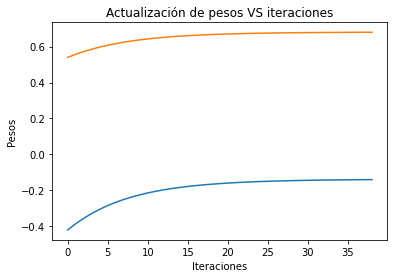

In [12]:
perc=Perceptron(2,1)
p=perc.Pesos(-0.5,0.5)
x=perc.SumaPonderada()
z=perc.Error()
y=perc.SalidaPerceptron()
w=perc.TerminoDeError1()
a=perc.TerminoDeError2()
b=perc.Incremento()
c=perc.Actualizar()
c=np.array(c)
xxx=[]
# perceptron training
for i in range(1,40):
  p=perc.Pesos(c[0],c[1])
  x=perc.SumaPonderada()
  z=perc.Error()
  y=perc.SalidaPerceptron()
  w=perc.TerminoDeError1()
  a=perc.TerminoDeError2()
  b=perc.Incremento()
  c=perc.Actualizar()
  c=np.array(c)
  xxx.append(c)

plt.plot(xxx)
plt.title('Actualización de pesos VS iteraciones')
plt.ylabel('Pesos')
plt.xlabel('Iteraciones')
plt.show

In [11]:
c

array([-0.14016658,  0.67991671])

Referencias:

https://es.wikipedia.org/wiki/Perceptr%C3%B3n

https://www.youtube.com/watch?v=IHZwWFHWa-w

https://www.youtube.com/watch?v=uiJiZ3JDafY